In [71]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## STEP 1. Install keras

```
conda install -c conda-forge tensorflow=1.10.0
```

## STEP 2. Fashion MNIST

- Import fashion dataset
- Plot it
- Make simple NN classifier using keras
- Play with dropout and different architectures

In [32]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

How many pictures do we have?

In [33]:
X_train.shape

(60000, 28, 28)

How many clases are there?

In [34]:
from collections import Counter
Counter(y_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

Let's plot it.

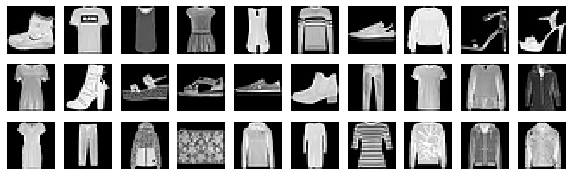

In [35]:
plt.figure(figsize=(10, 3))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [36]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [37]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [38]:
loss = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 57us/sample - loss: 0.8150 - accuracy: 0.7272 - val_loss: 0.6129 - val_accuracy: 0.7803
Epoch 2/30
48000/48000 [==============================] - 2s 46us/sample - loss: 0.5261 - accuracy: 0.8184 - val_loss: 0.5003 - val_accuracy: 0.8218
Epoch 3/30
48000/48000 [==============================] - 2s 48us/sample - loss: 0.4747 - accuracy: 0.8340 - val_loss: 0.4673 - val_accuracy: 0.8342
Epoch 4/30
48000/48000 [==============================] - 2s 48us/sample - loss: 0.4446 - accuracy: 0.8443 - val_loss: 0.4554 - val_accuracy: 0.8361
Epoch 5/30
48000/48000 [==============================] - 2s 49us/sample - loss: 0.4248 - accuracy: 0.8505 - val_loss: 0.4158 - val_accuracy: 0.8525
Epoch 6/30
48000/48000 [==============================] - 2s 50us/sample - loss: 0.4095 - accuracy: 0.8559 - val_loss: 0.4114 - val_accuracy: 0.8545
Epoch 7/30
48000/48000 [==============================] 

KeyboardInterrupt: 

# STEP 3

Repeat above process with tensorbaord log output.

In [39]:
import os
import time
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = TensorBoard(run_logdir)

In [40]:
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [41]:
loss = model.fit(X_train, y_train, epochs=30, validation_split=0.2,
                 callbacks=[tensorboard_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 53us/sample - loss: 0.8236 - accuracy: 0.7208 - val_loss: 0.5637 - val_accuracy: 0.8015
Epoch 2/30
48000/48000 [==============================] - 2s 45us/sample - loss: 0.5286 - accuracy: 0.8156 - val_loss: 0.4907 - val_accuracy: 0.8241
Epoch 3/30
48000/48000 [==============================] - 2s 48us/sample - loss: 0.4778 - accuracy: 0.8324 - val_loss: 0.4677 - val_accuracy: 0.8342
Epoch 4/30
48000/48000 [==============================] - 3s 55us/sample - loss: 0.4503 - accuracy: 0.8409 - val_loss: 0.4395 - val_accuracy: 0.8453
Epoch 5/30
48000/48000 [==============================] - 2s 42us/sample - loss: 0.4285 - accuracy: 0.8483 - val_loss: 0.4312 - val_accuracy: 0.8478
Epoch 6/30
48000/48000 [==============================] - 2s 44us/sample - loss: 0.4108 - accuracy: 0.8571 - val_loss: 0.4291 - val_accuracy: 0.8486
Epoch 7/30
48000/48000 [==============================] 



# STEP 4

Improve model further using CNN's and use tensorboard to track training process.

In [42]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

Let's fix input dimeansions. Note: convolutional layers must have filter dimension!

In [43]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [44]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()

# Create new file for logs
run_logdir = get_run_logdir()
tensorboard_cb = TensorBoard(run_logdir)

loss = model.fit(X_train, y_train, epochs=30, validation_split=0.2,
                 callbacks=[tensorboard_cb])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               102528    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

# Transfer learning

In [79]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [88]:
model = ResNet50(weights='imagenet', include_top=False)

In [89]:
output = GlobalAveragePooling2D()(model.output)
output = Dense(200, activation='relu')(output)
output = Dense(10, activation='softmax')(output)
model_with_dense_head = Model(inputs=model.input, outputs=output)

In [90]:
for layer in model.layers:
    layer.trainable = False

In [91]:
model_with_dense_head.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [92]:
# X_train = np.stack([X_train, X_train, X_train], axis=3).reshape((60000, 28, 28, 3))

In [93]:
# Create new file for logs
run_logdir = get_run_logdir()
tensorboard_cb = TensorBoard(run_logdir)

model_with_dense_head.fit(X_train, y_train, epochs=30, validation_split=0.2,
                 callbacks=[tensorboard_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 102s 2ms/sample - loss: 0.8108 - accuracy: 0.7148 - val_loss: 5.2794 - val_accuracy: 0.1003
Epoch 2/30
48000/48000 [==============================] - 100s 2ms/sample - loss: 0.6509 - accuracy: 0.7638 - val_loss: 4.4399 - val_accuracy: 0.0983
Epoch 3/30
48000/48000 [==============================] - 100s 2ms/sample - loss: 0.6085 - accuracy: 0.7779 - val_loss: 4.8257 - val_accuracy: 0.1003
Epoch 4/30
48000/48000 [==============================] - 101s 2ms/sample - loss: 0.5845 - accuracy: 0.7853 - val_loss: 5.9320 - val_accuracy: 0.1003
Epoch 5/30
48000/48000 [==============================] - 101s 2ms/sample - loss: 0.5705 - accuracy: 0.7931 - val_loss: 6.1795 - val_accuracy: 0.1003
Epoch 6/30
48000/48000 [==============================] - 101s 2ms/sample - loss: 0.5511 - accuracy: 0.7982 - val_loss: 5.1927 - val_accuracy: 0.1007
Epoch 7/30
48000/48000 [==========================

KeyboardInterrupt: 